# Brains, Primates and Artifical Intelligence
### Gen Reynolds
<table><tr><td><img src="slide_images/d305ec2a-9f5a-4894-8cd3-a7c43bb0756b-brain-640.jpg"width="75%"></td><td> <img src="slide_images/MVIMG_20180630_141951.jpg"width="50%"></td><td><img src="slide_images/giphy.gif"width="100%"></td></tr></table>
    

## What is Artifical Intelligence?

## The Human Brain
<div><img src="slide_images/brain-anatomy-44-728.jpg"width="25%"></div>
Complex organ
Neurons
Neural Networks


## Machine Learning and Neural Networks

## Learning How to Make A Model Using Kaggle's Deep Learning Tutorial

In [2]:
# Pointing the code towards the files to use for the model training
from os.path import join
#Want to make this read straight from a zip file! Currently have to unzip the file 
image_dir = 'tutorial_files/indentifying_dog_breeds/train'
# Testing with one image, want to select a number randomn images within the folder
img_paths = [join(image_dir, filename) for filename in
          ['cocker_spaniel.jpg']]


#### Creating a function to read the images and prepare them for modelling 

In [3]:
import numpy as np
from PIL import Image
from tensorflow.python.keras.applications.resnet50 import preprocess_input
from tensorflow.python.keras.preprocessing.image import load_img, img_to_array

image_size= 224

def img_read_and_prepare(img_paths,img_height=image_size,img_width=image_size):
    imgs=[load_img(img_path,target_size=(img_height,img_width))for img_path in img_paths]
    img_array= np.array([img_to_array(img) for img in imgs])
    return preprocess_input(img_array)

#### Creating tutorial model using pretrained weights to make predictions

In [4]:
from tensorflow.python.keras.applications import ResNet50

my_model = ResNet50(weights='tutorial_files/ResNet50/resnet50_weights_tf_dim_ordering_tf_kernels.h5/resnet50_weights_tf_dim_ordering_tf_kernels.h5')

In [5]:
test_data = img_read_and_prepare(img_paths)
preds = my_model.predict(test_data)

#### Visualising the Model

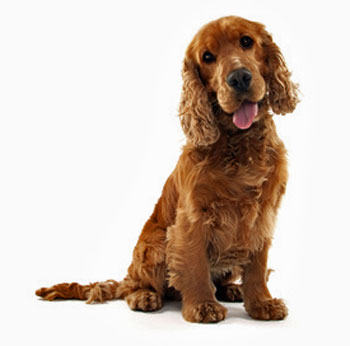

[('n02102318', 'cocker_spaniel', 0.54071003), ('n02102480', 'Sussex_spaniel', 0.35997143), ('n02102177', 'Welsh_springer_spaniel', 0.018370267)]


In [6]:
import sys
sys.path.append('tutorial_files/utils')
from decode_predictions import decode_predictions
from IPython.display import Image, display

most_likely_labels= decode_predictions(preds, top=3, class_list_path='tutorial_files/ResNet50/imagenet_class_index.json')

for i, img_path in enumerate(img_paths):
    display(Image(img_path))
    print(most_likely_labels[i])

## Using Transfer Learning to Create my own Model To Identify Primates

In [25]:
from tensorflow.python.keras.applications import ResNet50
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, GlobalAveragePooling2D

#Here I am setting the number of node classes I want my model to group it's predictions into
num_classes = 10
resnet_weights_path='tutorial_files/ResNet50/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5'
my_new_model= Sequential()
#Here I am excluding the top layer of my neural network because I want to modify the existing functionality to test my own data
my_new_model.add(ResNet50(include_top=False, pooling='avg', weights=resnet_weights_path))
my_new_model.add(Dense(num_classes, activation='softmax'))
#In this case because the model is already trained I am not going to train the first layer of the network
my_new_model.layers[0].trainable=False

#### Compiling my model

In [26]:
my_new_model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

#### Fitting My Model

In [39]:
from tensorflow.python.keras.applications.resnet50 import preprocess_input
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator


image_size = 224

data_generator = ImageDataGenerator(preprocessing_function= preprocess_input)

train_generator = data_generator.flow_from_directory(
    'primate_model/training',
    target_size = (image_size,image_size),
    batch_size = 12,
    class_mode = 'categorical')

validation_generator = data_generator.flow_from_directory(
    'primate_model/validation',
    class_mode= 'categorical')

my_new_model.fit_generator(
    train_generator,
    steps_per_epoch = 10,
    epochs = 3,
    validation_data = validation_generator,
    validation_steps = 1,
)
# Using the Adam optimiser has made the model more accurate and reduced the loss 

Found 1097 images belonging to 10 classes.
Found 272 images belonging to 10 classes.
Epoch 1/3
10/10 [==============================] - 185s 18s/step - loss: 1.8052 - acc: 0.4083 - val_loss: 1.4080 - val_acc: 0.5000
Epoch 2/3
10/10 [==============================] - 176s 18s/step - loss: 1.4747 - acc: 0.5917 - val_loss: 0.9802 - val_acc: 0.6562
Epoch 3/3
10/10 [==============================] - 173s 17s/step - loss: 1.2011 - acc: 0.6961 - val_loss: 0.7726 - val_acc: 0.7500


## Making My Own Model

In [38]:
# The above model is not as accurate as I would like, therefore I am going to make my own model
import time
from datetime import timedelta
import math
import random

from numpy.random import seed
seed(1)
from tensorflow import set_random_seed
set_random_seed(2)


In [50]:
import pandas as pd
batch_size = 20
cols = ['Class','Latin Name', 'Common Name','Train Images', 'Validation Images']
classes = pd.read_csv("primate_model/monkey_labels.txt", names=cols, skiprows=1 ,usecols=range(3))
num_classes = len(classes)
classes

,Class,Latin Name,Common Name
0,n0,alouatta_palliata\t,mantled_howler
1,n1,erythrocebus_patas\t,patas_monkey
2,n2,cacajao_calvus\t,bald_uakari
3,n3,macaca_fuscata\t,japanese_macaque
4,n4,cebuella_pygmea\t,pygmy_marmoset
5,n5,cebus_capucinus\t,white_headed_capuchin
6,n6,mico_argentatus\t,silvery_marmoset
7,n7,saimiri_sciureus\t,common_squirrel_monkey
8,n8,aotus_nigriceps\t,black_headed_night_monkey
9,n9,trachypithecus_johnii,nilgiri_langur


In [51]:
# Setting up validation data
validation_size = 0.25
img_size = 128
num_channels = 3
train_images = 'primate_model/training'

In [ ]:
# loading into memory the data
data.dataset.read_train_sets(train_images,img_size, classes)

## Some awesome resources

<html><body><p><u>Websites:</u>.</p></body></html>

Kaggle - https://www.kaggle.com

Tensor Flow playground - https://playground.tensorflow.org

Machine box - https://machinebox.io

<html><body><p><u>Youtube channels:</u>.</p></body></html>

<html><body><p><u>Libraries:</u>.</p></body></html>
